In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

In [2]:
# Import dataset
df = pd.read_csv("housing-data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Get rid of non-numerical features - we don't want to preprocess non-numerical
numerical_list = ['int64','float64']
numerical_cols = list(df.select_dtypes(include = numerical_list).columns)

In [5]:
len(numerical_cols)

38

In [6]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
df = df[numerical_cols]

In [8]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
### Train test split to avoid overfitting
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Id', 'SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [12]:
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [13]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [14]:
# Determine the mutual info
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.24841391, 0.21581313, 0.16308432, 0.51790956, 0.1029638 ,
       0.35416363, 0.24056791, 0.09497879, 0.15789006, 0.        ,
       0.11376429, 0.38458683, 0.31103649, 0.2285645 , 0.        ,
       0.48037027, 0.03586494, 0.00468212, 0.24755387, 0.08492513,
       0.03419476, 0.0270504 , 0.1810301 , 0.18268966, 0.26646359,
       0.38140207, 0.36959837, 0.06078901, 0.17415005, 0.00972577,
       0.01260952, 0.01657406, 0.        , 0.00824448, 0.        ,
       0.        ])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.517910
GrLivArea        0.480370
TotalBsmtSF      0.384587
GarageCars       0.381402
GarageArea       0.369598
YearBuilt        0.354164
1stFlrSF         0.311036
GarageYrBlt      0.266464
MSSubClass       0.248414
FullBath         0.247554
YearRemodAdd     0.240568
2ndFlrSF         0.228564
LotFrontage      0.215813
Fireplaces       0.182690
TotRmsAbvGrd     0.181030
OpenPorchSF      0.174150
LotArea          0.163084
BsmtFinSF1       0.157890
BsmtUnfSF        0.113764
OverallCond      0.102964
MasVnrArea       0.094979
HalfBath         0.084925
WoodDeckSF       0.060789
BsmtFullBath     0.035865
BedroomAbvGr     0.034195
KitchenAbvGr     0.027050
ScreenPorch      0.016574
3SsnPorch        0.012610
EnclosedPorch    0.009726
MiscVal          0.008244
BsmtHalfBath     0.004682
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot:>

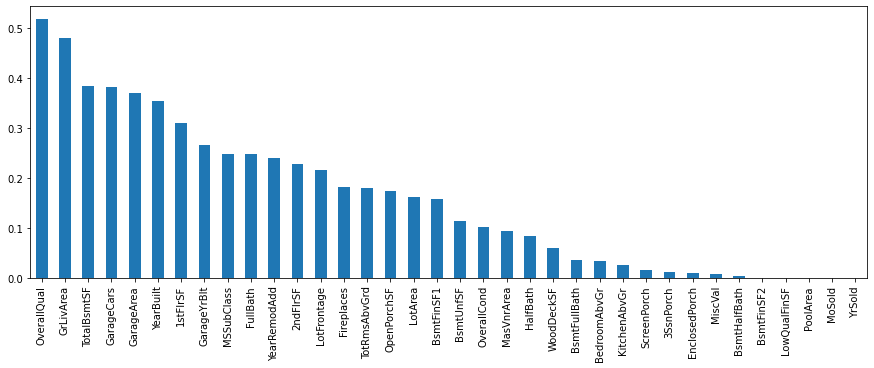

In [16]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [18]:
## Selecting the top 25 percentile - we can use selectk instead of percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=25)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=25,
                 score_func=<function mutual_info_regression at 0x000001B510B18AF0>)

In [19]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [20]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')